# Cash Spend Analytics # 

In [171]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np

# 1. Import the cash spend data from SAP (in a .csv format)

In [158]:
# Import the file
df = pd.read_excel("cash purchases.xlsx")
df.head(5)

,Unit,Trading Outlet,Vendor Name,Commodity,Rep Type,Purchase Reason,Value,___Date___
0,94080,0094080001 DC Wakefield AD,CP bookers,Meat,1,Client preference,37.45,2020-03-31
1,94080,0094080001 DC Wakefield AD,CP bookers,Dairy & Cheese,1,Authorised vendor failed to deliver,90.15,2020-06-30
2,94080,0094080001 DC Wakefield AD,CP bookers cash & carry,Dairy & Cheese,1,Authorised vendor failed to deliver,57.75,2020-01-02
3,94080,0094080001 DC Wakefield AD,CP bookers,Dairy & Cheese,1,Authorised vendor failed to deliver,20.97,2019-12-03
4,94080,0094080001 DC Wakefield AD,CP bookers cash & carry,Dairy & Cheese,1,Authorised vendor failed to deliver,15.67,2020-01-21


In [159]:
# Check the basic info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39687 entries, 0 to 39686
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unit             39687 non-null  object        
 1   Trading Outlet   39687 non-null  object        
 2   Vendor Name      39687 non-null  object        
 3   Commodity        39687 non-null  object        
 4   Rep Type         39687 non-null  int64         
 5   Purchase Reason  39687 non-null  object        
 6   Value            39687 non-null  float64       
 7   ___Date___       39687 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 2.4+ MB


In [160]:
# Rename the Date header file
df.rename(columns={'___Date___':'Date'}, inplace=True)
df.head(5)

,Unit,Trading Outlet,Vendor Name,Commodity,Rep Type,Purchase Reason,Value,Date
0,94080,0094080001 DC Wakefield AD,CP bookers,Meat,1,Client preference,37.45,2020-03-31
1,94080,0094080001 DC Wakefield AD,CP bookers,Dairy & Cheese,1,Authorised vendor failed to deliver,90.15,2020-06-30
2,94080,0094080001 DC Wakefield AD,CP bookers cash & carry,Dairy & Cheese,1,Authorised vendor failed to deliver,57.75,2020-01-02
3,94080,0094080001 DC Wakefield AD,CP bookers,Dairy & Cheese,1,Authorised vendor failed to deliver,20.97,2019-12-03
4,94080,0094080001 DC Wakefield AD,CP bookers cash & carry,Dairy & Cheese,1,Authorised vendor failed to deliver,15.67,2020-01-21


# 2. Perform very basic data analytics on the spend

# 2.a Identify the 20 largest commodity categories for cash purchases

In [180]:
df_commodity = df['Commodity'].value_counts()
df_commodity.head(1)

Dairy & Cheese    7164
Name: Commodity, dtype: int64

In [181]:
df_commodity2 = df[['Commodity', 'Value']]
df_commodity2.head(2)

,Commodity,Value
0,Meat,37.45
1,Dairy & Cheese,90.15


# 2.b Identify the top largest individual purchases

In [161]:
df_sorted = df.sort_values(by='Value', ascending=False, inplace=False, ignore_index=False)
df_sorted.head(5)

,Unit,Trading Outlet,Vendor Name,Commodity,Rep Type,Purchase Reason,Value,Date
10411,98479,0098479001 Travis Perkins - Lod,CP Chelsea Hire,Equipment Hire,1,Authorised vendor failed to deliver,1400.00,2019-12-24
35573,77066,0077066001 Edinburgh Zoo,CP BIDFOOD,Beverage Alcohol,1,Product/service unavailable from vendor,833.33,2019-11-26
35571,77066,0077066001 Edinburgh Zoo,CP BIDFOOD,Beverage Alcohol,1,Product/service unavailable from vendor,833.33,2019-11-26
35574,77066,0077066001 Edinburgh Zoo,CP BIDFOOD,Beverage Alcohol,1,Product/service unavailable from vendor,762.13,2019-11-26
26610,77093,0077093001 St Joseph's R.C High,CP the drink shop,Beverages Cold,1,Product/service unavailable from vendor,719.25,2019-10-23


# 2.c Identify the top 30 largest units by spend

In [ ]:
df_unit = df[['Trading Outlet','Value']]
df_unit_grouped = df_unit.groupby(['Trading Outlet'],as_index=False).sum()
df_unit_grouped2 = df_unit_grouped.sort_values(by='Value', ascending=False)
df_unit_grouped2.head(1)

# 2.d Identify the top 20 largest vendors by spend

In [166]:
# Identify the top 20 largest vendors by spend
df_vendor = df[['Vendor Name','Value']]
df_vendor_grouped = df_vendor.groupby(['Vendor Name'],as_index=False).sum()
df_vendor_grouped2 = df_vendor_grouped.sort_values(by='Value', ascending=False)
df_vendor_grouped2.head(1)

,Vendor Name,Value
5204,CP tesco,48571.88


# 2.e Identify the monthly data spend and trends

# 3. Perform some data visualisation on the data


# 3.a Run a histogram to understand the distribution of purchase reasons

(array([10372.,  8836., 11319.,  3230.,  2161.,  1623.,   902.,   525.,
           36.,   683.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

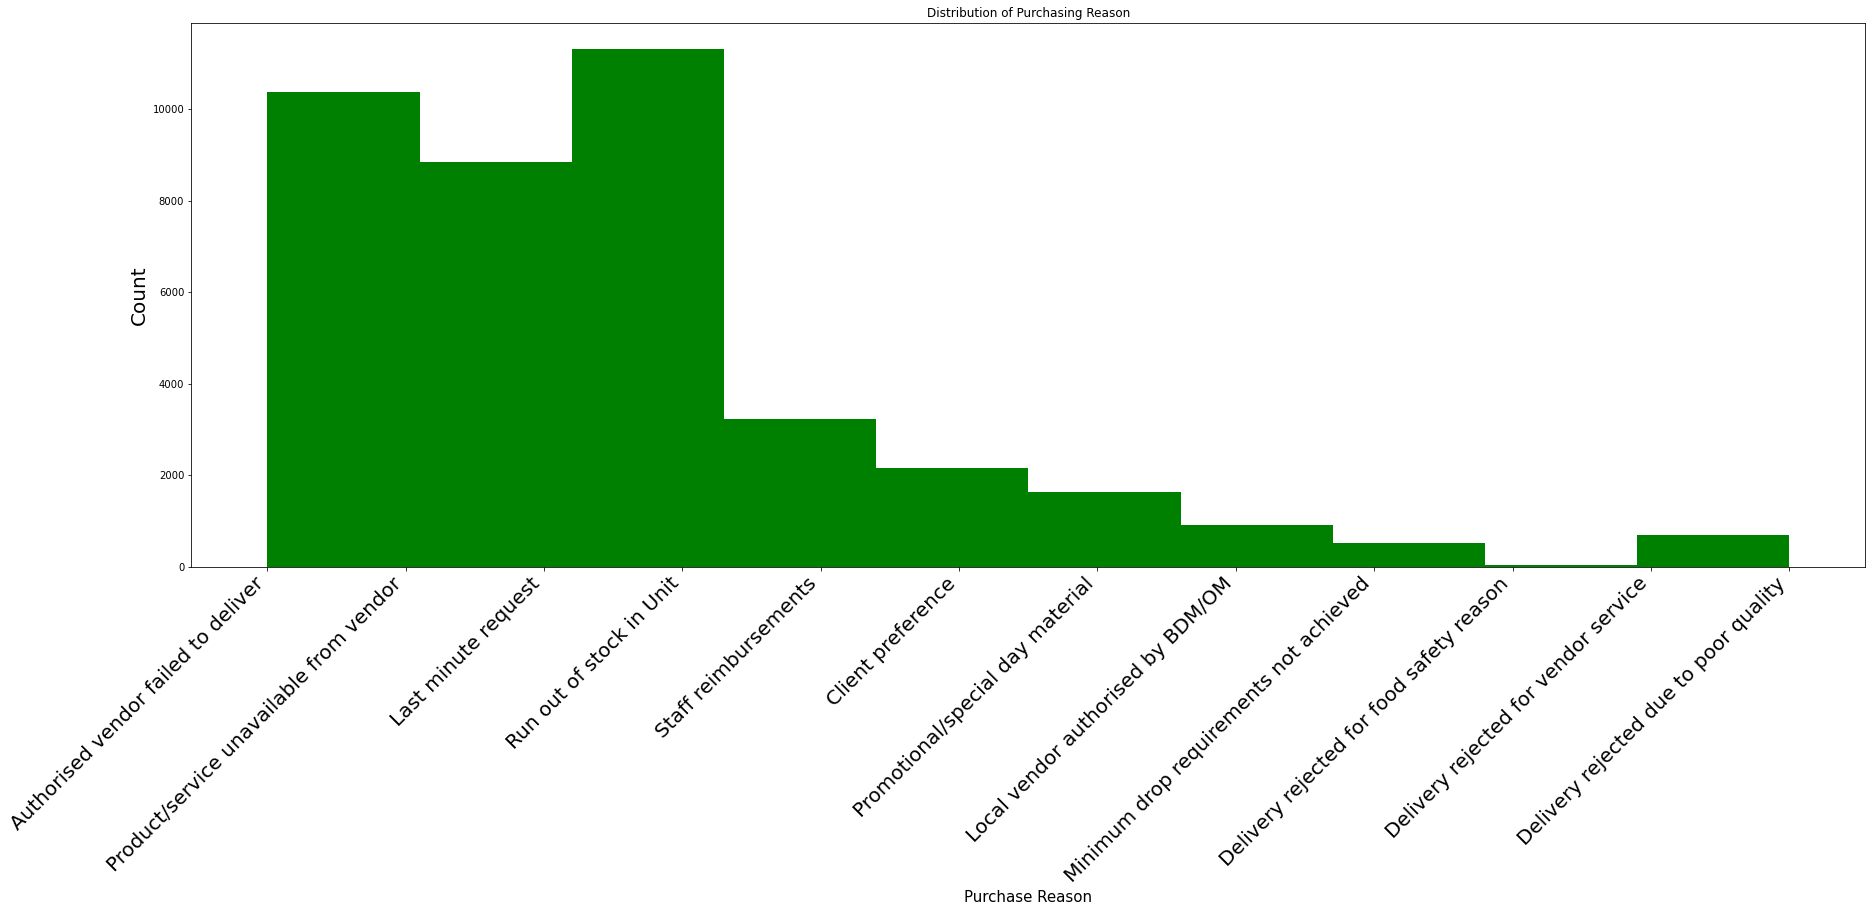

In [122]:
plt.pyplot.figure(figsize=[30,10])
plt.pyplot.title("Distribution of Purchasing Reason")
plt.pyplot.xlabel('Purchase Reason',fontsize=15)
plt.pyplot.xticks(fontsize=20, rotation = 45, ha="right")
#plt.pyplot.xticklabels(xticklabels)
plt.pyplot.ylabel('Count',fontsize=20)
plt.pyplot.hist(df_sorted["Purchase Reason"], bins=10, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color='green', label=None, stacked=False)

# 3.b Run a bar chart to see how cash spend breaks down by category

<AxesSubplot:xlabel='Value', ylabel='Commodity'>

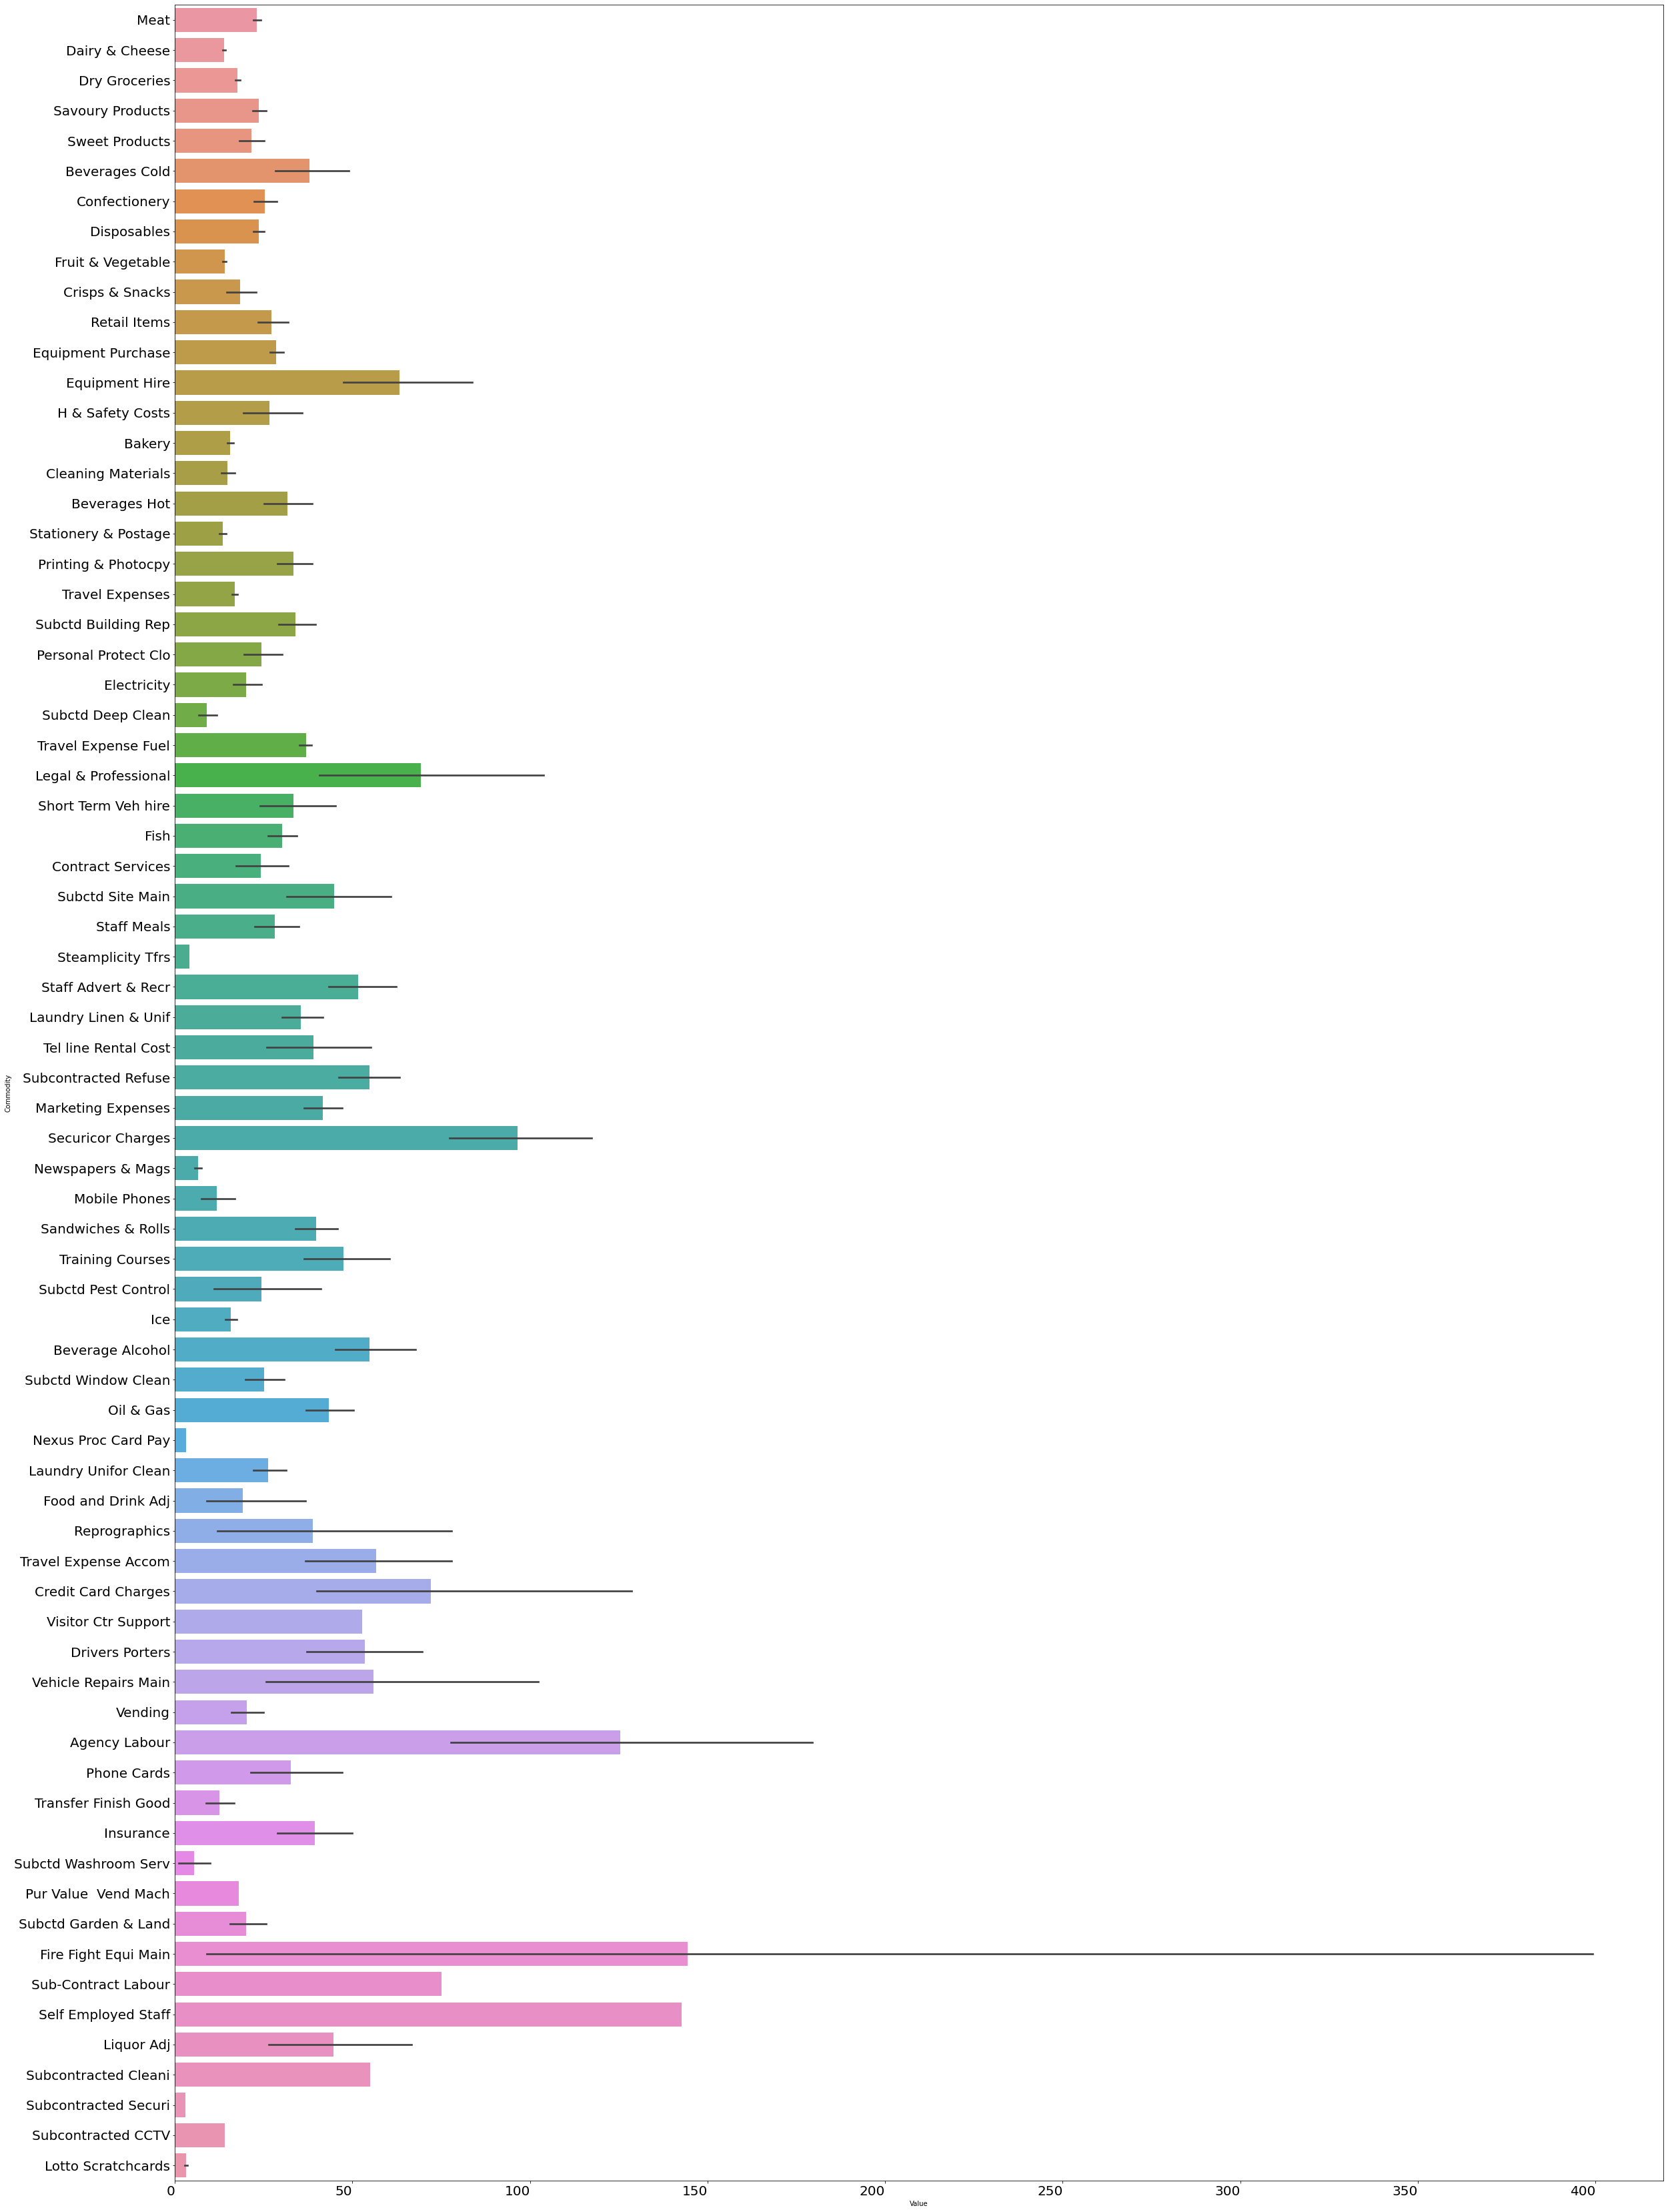

In [203]:
plt.pyplot.figure(figsize=[40,60])
plt.pyplot.xticks(fontsize=20, rotation = 0, ha="right")
plt.pyplot.yticks(fontsize=20)
sns.barplot(x="Value", y="Commodity", hue=None, data=df_commodity2, order=None, hue_order=None, orient=None, color=None, palette=None)